# Model Tuning - Decision Tree

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor

warnings.filterwarnings('ignore')
%matplotlib inline

SEED=42

In [3]:
ci_i5_ap = pd.read_csv('./data/ci_i5_ap.csv')

In [4]:
ci_i5_ap_train, ci_i5_ap_test, ci_i5_ap_train_Y, ci_i5_ap_test_Y = train_test_split(ci_i5_ap, ci_i5_ap['price'], test_size=0, random_state=42)
ci_i5_ap_train.drop('price', axis=1, inplace=True)
ci_i5_ap_train.drop('date', axis=1, inplace=True)
ci_i5_ap_train.drop('id', axis=1, inplace=True)

In [5]:
ci_i5_ap_train.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
i5_dist          float64
yr_purch           int64
mnth_purch         int64
distSeattle      float64
durSeattle       float64
distBellevue     float64
durBellevue      float64
distRedmond      float64
durRedmond       float64
distBF           float64
distRA           float64
distSeaTac       float64
dtype: object

In [6]:
params = {
    'objective': ['reg:linear'],
    'seed': [SEED],

    # 1
    'max_depth': range(1, 26, 1),
    
    # 2
    'min_samples_leaf': range(1, 26, 1),
    'min_samples_split': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    
    # 3
    'learning_rate': [0.01]
}

### max_depth

In [7]:
scores = dict()

for max_depth in params['max_depth']:
    if 'max_depth' not in scores:
        scores['max_depth'] = dict()
    dtr = DecisionTreeRegressor(max_depth=max_depth, random_state=SEED)
    cv = cross_val_score(dtr, ci_i5_ap_train, ci_i5_ap_train_Y, cv=10, scoring='neg_median_absolute_error')
    scores['max_depth'][max_depth] = cv.mean()

print(scores)

{'max_depth': {1: -141642.69225286174, 2: -101288.32176587182, 3: -86779.3767732823, 4: -75851.43691673114, 5: -68761.03588614767, 6: -63370.30956109208, 7: -59313.035540123856, 8: -55508.074906867056, 9: -53090.648414534946, 10: -50717.16674304528, 11: -49382.40711070548, 12: -48756.59217690294, 13: -48802.46079185838, 14: -48776.34458162817, 15: -48852.33995901108, 16: -49635.45184156565, 17: -50574.79879442692, 18: -51729.28499762053, 19: -51906.58653846154, 20: -52200.622685666734, 21: -53315.533333333326, 22: -53798.925, 23: -53721.083333333336, 24: -54296.56666666667, 25: -53938.15}}


### min_samples_leaf

In [8]:
backup = scores.copy()

for min_samples_leaf in params['min_samples_leaf']:
    if 'min_samples_leaf' not in scores:
        scores['min_samples_leaf'] = dict()
    dtr = DecisionTreeRegressor(
        max_depth=12, 
        min_samples_leaf=min_samples_leaf, 
        random_state=SEED
    )
    cv = cross_val_score(dtr, ci_i5_ap_train, ci_i5_ap_train_Y, cv=10, scoring='neg_median_absolute_error')
    scores['min_samples_leaf'][min_samples_leaf] = cv.mean()

print(scores)

{'max_depth': {1: -141642.69225286174, 2: -101288.32176587182, 3: -86779.3767732823, 4: -75851.43691673114, 5: -68761.03588614767, 6: -63370.30956109208, 7: -59313.035540123856, 8: -55508.074906867056, 9: -53090.648414534946, 10: -50717.16674304528, 11: -49382.40711070548, 12: -48756.59217690294, 13: -48802.46079185838, 14: -48776.34458162817, 15: -48852.33995901108, 16: -49635.45184156565, 17: -50574.79879442692, 18: -51729.28499762053, 19: -51906.58653846154, 20: -52200.622685666734, 21: -53315.533333333326, 22: -53798.925, 23: -53721.083333333336, 24: -54296.56666666667, 25: -53938.15}, 'min_samples_leaf': {1: -48756.59217690294, 2: -49177.80413527776, 3: -49277.05697990187, 4: -49357.011978472576, 5: -48898.71474849229, 6: -49388.87307560806, 7: -48673.85483506958, 8: -48796.28286424531, 9: -49306.39618831704, 10: -49134.55143903055, 11: -48653.50916196743, 12: -48699.63284434767, 13: -48728.649023088605, 14: -48893.45585068924, 15: -48797.43047239429, 16: -48879.8711780168, 17: -4

### min_samples_split

In [9]:
backup1 = scores.copy()

for min_samples_split in params['min_samples_split']:
    if 'min_samples_split' not in scores:
        scores['min_samples_split'] = dict()
    dtr = DecisionTreeRegressor(
        max_depth=12, 
        min_samples_leaf=11,
        min_samples_split=min_samples_split,
        random_state=SEED
    )
    cv = cross_val_score(dtr, ci_i5_ap_train, ci_i5_ap_train_Y, cv=10, scoring='neg_median_absolute_error')
    scores['min_samples_split'][min_samples_split] = cv.mean()

print(scores)

{'max_depth': {1: -141642.69225286174, 2: -101288.32176587182, 3: -86779.3767732823, 4: -75851.43691673114, 5: -68761.03588614767, 6: -63370.30956109208, 7: -59313.035540123856, 8: -55508.074906867056, 9: -53090.648414534946, 10: -50717.16674304528, 11: -49382.40711070548, 12: -48756.59217690294, 13: -48802.46079185838, 14: -48776.34458162817, 15: -48852.33995901108, 16: -49635.45184156565, 17: -50574.79879442692, 18: -51729.28499762053, 19: -51906.58653846154, 20: -52200.622685666734, 21: -53315.533333333326, 22: -53798.925, 23: -53721.083333333336, 24: -54296.56666666667, 25: -53938.15}, 'min_samples_leaf': {1: -48756.59217690294, 2: -49177.80413527776, 3: -49277.05697990187, 4: -49357.011978472576, 5: -48898.71474849229, 6: -49388.87307560806, 7: -48673.85483506958, 8: -48796.28286424531, 9: -49306.39618831704, 10: -49134.55143903055, 11: -48653.50916196743, 12: -48699.63284434767, 13: -48728.649023088605, 14: -48893.45585068924, 15: -48797.43047239429, 16: -48879.8711780168, 17: -4

### $-MAE$ respective to max_depth

Text(0.5,1,'-MAE According to Max Depth')

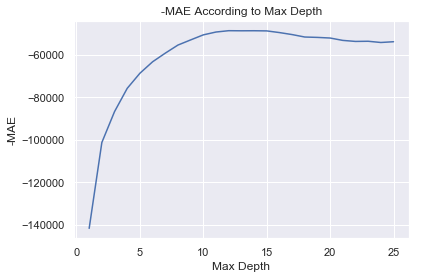

In [10]:
# convert to pandas dataframe
md = {'Max Depth': list(scores['max_depth'].keys()), '-MAE': list(scores['max_depth'].values())}
md_df = pd.DataFrame(md)

# plot using lineplot
sns.set(style='darkgrid')
sns.lineplot(x='Max Depth', y='-MAE', data=md_df).set_title("-MAE According to Max Depth")

### $-MAE$ respective to min_samples_leaf

Text(0.5,1,'-MAE According to Minimum Leaf Samples')

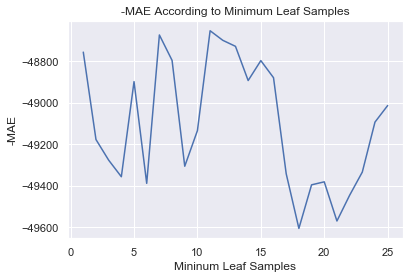

In [11]:
# convert to pandas dataframe
md = {'Mininum Leaf Samples': list(scores['min_samples_leaf'].keys()), '-MAE': list(scores['min_samples_leaf'].values())}
md_df = pd.DataFrame(md)

# plot using lineplot
sns.set(style='darkgrid')
sns.lineplot(x='Mininum Leaf Samples', y='-MAE', data=md_df).set_title("-MAE According to Minimum Leaf Samples")

### $-MAE$ respective to min_samples_split

Text(0.5,1,'-MAE According to Minimum Split Samples')

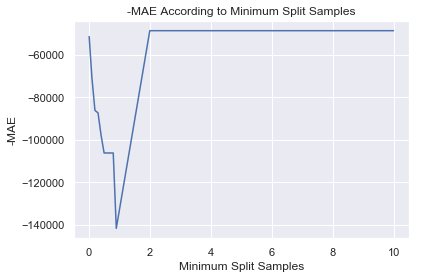

In [12]:
# convert to pandas dataframe
md = {'Minimum Split Samples': list(scores['min_samples_split'].keys()), '-MAE': list(scores['min_samples_split'].values())}
md_df = pd.DataFrame(md)

# plot using lineplot
sns.set(style='darkgrid')
sns.lineplot(x='Minimum Split Samples', y='-MAE', data=md_df).set_title("-MAE According to Minimum Split Samples")

So, best max_depth=12, min_samples_leaf=11, and min_samples_split=2 and that $-MAE$ score is -$48653.50 which is an improvement over the original XGBoost model.